In [65]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples) (m, Hi, Wi, Ci)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples) (m, n_y)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,:]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches


def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y


def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3

def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [12288, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

#def predict(X, parameters):
#    
#    W1 = tf.convert_to_tensor(parameters["W1"])
#    b1 = tf.convert_to_tensor(parameters["b1"])
#    W2 = tf.convert_to_tensor(parameters["W2"])
#    b2 = tf.convert_to_tensor(parameters["b2"])
##    W3 = tf.convert_to_tensor(parameters["W3"])
##    b3 = tf.convert_to_tensor(parameters["b3"])
#    
##    params = {"W1": W1,
##              "b1": b1,
##              "W2": W2,
##              "b2": b2,
##              "W3": W3,
##              "b3": b3}
#
#    params = {"W1": W1,
#              "b1": b1,
#              "W2": W2,
#              "b2": b2}    
#    
#    x = tf.placeholder("float", [12288, 1])
#    
#    z3 = forward_propagation(x, params)
#    p = tf.argmax(z3)
#    
#    with tf.Session() as sess:
#        prediction = sess.run(p, feed_dict = {x: X})
#        
#    return prediction

In [66]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
#from cnn_utils import *

In [32]:
data = np.array(pd.read_csv("train.csv"))
X_train = data[:,1:]/255
Y_train = data[:,:1]
print(X_train.shape)

(27455, 784)


In [57]:
test_data = np.array(pd.read_csv("test.csv"))
X_test = test_data[:,1:]/255
Y_test = test_data[:,:1]
print(X_test.shape,Y_test.shape)

(7172, 784) (7172, 1)


In [41]:
#print(Y_train[3],Y_train[28],Y_train[8],Y_train[6])
m = Y_train.shape[0]
#print(m)
p = []
for i in range(m):
    k = []
    for j in range(25):
        #print(j,Y_train[i])
        if j==Y_train[i]:
            k.append(1)
        else:
            k.append(0)
    p.append(k)
        
Y_train = np.array(p)




In [59]:
m = Y_test.shape[0]
#print(m)
p = []
for i in range(m):
    k = []
    for j in range(25):
        #print(j,Y_train[i])
        if j==Y_test[i]:
            k.append(1)
        else:
            k.append(0)
    p.append(k)
Y_test = np.array(p)

(27455, 28, 28)
(27455, 28, 28, 1) (27455, 25)
(7172, 28, 28)
(7172, 28, 28, 1) (7172, 25)


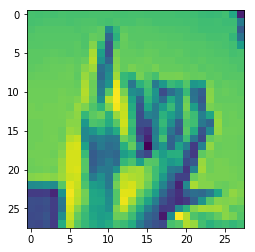

In [94]:
X_train = X_train.reshape(27455,28,28)
print(X_train.shape)
X_train = X_train.reshape(27455,28,28,1)
print(X_train.shape,Y_train.shape)
X_test = X_test.reshape(7172,28,28)
print(X_test.shape)
plt.imshow(X_test[11])
X_test = X_test.reshape(7172,28,28,1)
print(X_test.shape,Y_test.shape)


In [43]:
def create_input():
    X = tf.placeholder(name = "X",shape = [None,28,28,1],dtype = tf.float32)
    Y = tf.placeholder(name = "Y",shape = [None,25],dtype = tf.float32)
    return X,Y

In [44]:
def init_parameters():
    W1 = tf.get_variable("W1",shape = [4,4,1,8])
    W2 = tf.get_variable("W2",shape = [2,2,8,16])
    parameters = {"W1":W1, "W2":W2}
    return parameters

In [45]:
def forward_prop(X,parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    Z1 = tf.nn.conv2d(X,W1,strides = [1,1,1,1],padding = 'SAME')
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1,strides = [1,4,4,1],ksize = [1,4,4,1],padding = 'SAME')
    Z2 = tf.nn.conv2d(P1,W2,strides = [1,1,1,1],padding = 'SAME')
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2,strides = [1,2,2,1],ksize = [1,2,2,1],padding = 'SAME')
    P2 = tf.contrib.layers.flatten(P2)
    Z3 = tf.contrib.layers.fully_connected(P2, 25,activation_fn=None)
    return Z3

In [46]:
def compute_cost(Z3, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
    return cost

In [89]:
print(X_train.shape,Y_train.shape)
total_batches = 128
seed = 0
m = X_train.shape[0]
ops.reset_default_graph()  
X,Y = create_input()
parameters = init_parameters()
Z3 = forward_prop(X,parameters)
cost = compute_cost(Z3, Y)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.009).minimize(cost)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(10):
        mini_batch_cost = 0
        mini_batch_size = int(m/128)
        seed = seed + 1
        minibatches = random_mini_batches(X_train, Y_train, mini_batch_size, seed)
        #print(minibatches)
        for batch in minibatches:
            mini_X,mini_Y = batch
            _,temp_cost = sess.run([optimizer,cost],feed_dict = {X:mini_X,Y:mini_Y})
            mini_batch_cost += temp_cost / 128
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
    

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(accuracy)
    train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
    test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    


(27455, 28, 28, 1) (27455, 25)
Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.9997086
Test Accuracy: 0.8526213
